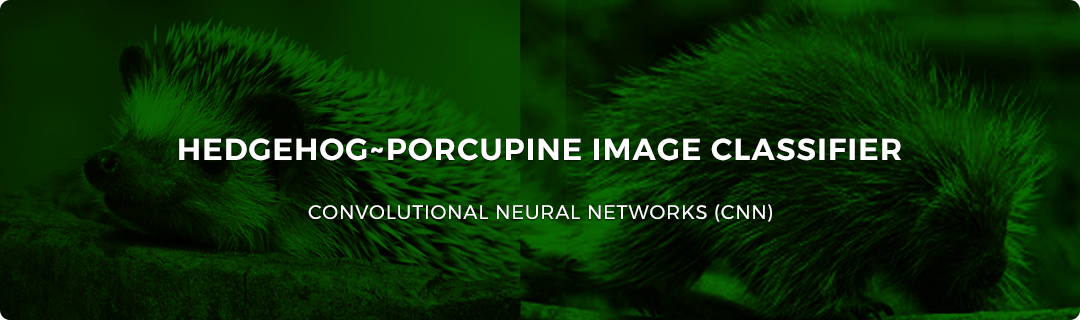

## 1. INTRODUCTION
Recently I was looking at an image of two beautiful animals that looked very much alike, `hedgehog` and `porcupine`, and I thought it would be fun to build a deep learning model that could predict if an animal is a hedgehog or a porcupine. To do this, I decided to use one of the most popular deep neural networks, **Convolutional Neural Networks (CNN)**. A convolutional neural network is a type of deep neural network that is widely used to analyze visual imagery in deep learning.

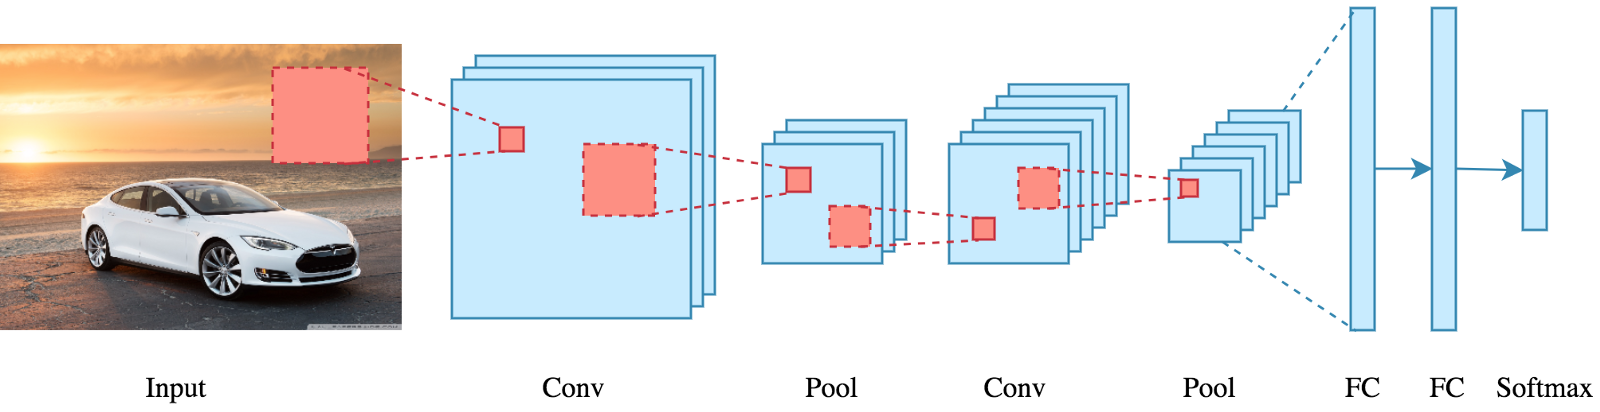

**[IMAGE SOURCE](https://www.analyticsvidhya.com/blog/2021/05/convolutional-neural-networks-cnn/)**

In a nutshell, what a CNN does is that it reduces images into a more workable format while retaining essential components for accurate prediction.

<h4 style="background-color:#242c24;color:white;border-radius: 8px; padding:12px">1.1. DATA SOURCE</h4>

I obtained the data from Google and grouped them into two separate folders, one for `hedgehog` and the other for `porcupine`. I also did some preliminary cleaning by deleting vector files and removing images that are below 10 kbytes in size.

**IMAGE CLASSES:**<br>
There are two image classes in the data:<br>
**`Hedgehogs`:** A spiny mammal of the subfamily Erinaceinae, in the eulipotyphlan family Erinaceidae.[Reference](https://en.wikipedia.org/wiki/Hedgehog).<br>
**`Porcupines`:** Large rodents with coats of sharp spines, or quills, that protect them against predation.[Reference](https://en.wikipedia.org/wiki/Porcupine).

## 2. IMPORT LIBRARIES AND PROCESS DATA
<h4 style="background-color:#242c24;color:white;border-radius: 8px; padding:12px">2.1. LOADING THE DEPENDENCIES</h4>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

import cv2
import imghdr

# import model 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense

#import warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/porcupinehedgehogtest/porcupinetest.jpeg
/kaggle/input/porcupinehedgehogtest/hedgehogtest.jpeg
/kaggle/input/hedgehogs-and-porcupines/data/porcupines/Cape-porcupine.jpg
/kaggle/input/hedgehogs-and-porcupines/data/porcupines/images141.jpg
/kaggle/input/hedgehogs-and-porcupines/data/porcupines/images210.jpg
/kaggle/input/hedgehogs-and-porcupines/data/porcupines/Cape-porcupine-portrait.jpg
/kaggle/input/hedgehogs-and-porcupines/data/porcupines/images239.jpg
/kaggle/input/hedgehogs-and-porcupines/data/porcupines/images319.jpg
/kaggle/input/hedgehogs-and-porcupines/data/porcupines/images22.jpg
/kaggle/input/hedgehogs-and-porcupines/data/porcupines/images282.jpg
/kaggle/input/hedgehogs-and-porcupines/data/porcupines/image23.jpeg
/kaggle/input/hedgehogs-and-porcupines/data/porcupines/images232.jpg
/kaggle/input/hedgehogs-and-porcupines/data/porcupines/images11.jpg
/kaggle/input/hedgehogs-and-porcupines/data/porcupines/images178.jpg
/kaggle/input/hedgehogs-and-porcupines/data/por

<h4 style="background-color:#242c24;color:white;border-radius: 8px; padding:12px">2.2. REMOVING CORRUPT IMAGES</h4>

In [2]:
data_dir = '../input/hedgehogs-and-porcupines/data' 

#Image Extensions
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [3]:
for image_class in os.listdir(data_dir):
    print(image_class)

porcupines
hedgehogs


Our image class as we can see are **`porcupines`** and **`hedgehogs`**. Let's loop through every single image in the directory to remove corrupt files.

In [4]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            #Pass through open CV
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                #Remove images without a valid image extension
                os.remove(image_path) 
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list ../input/hedgehogs-and-porcupines/data/porcupines/Cape-porcupine.jpg
Issue with image ../input/hedgehogs-and-porcupines/data/porcupines/Cape-porcupine.jpg
Image not in ext list ../input/hedgehogs-and-porcupines/data/porcupines/b375d78386d9d3b245600e9ee092e2cd.jpg
Issue with image ../input/hedgehogs-and-porcupines/data/porcupines/b375d78386d9d3b245600e9ee092e2cd.jpg
Image not in ext list ../input/hedgehogs-and-porcupines/data/porcupines/1200px-Crazy_eyes_the_porcupine.jpg
Issue with image ../input/hedgehogs-and-porcupines/data/porcupines/1200px-Crazy_eyes_the_porcupine.jpg
Image not in ext list ../input/hedgehogs-and-porcupines/data/hedgehogs/hedgehog_1200x675.jpg
Issue with image ../input/hedgehogs-and-porcupines/data/hedgehogs/hedgehog_1200x675.jpg
Image not in ext list ../input/hedgehogs-and-porcupines/data/hedgehogs/adult-male-four-toed-hedgehog-260nw-1915433362.jpg
Issue with image ../input/hedgehogs-and-porcupines/data/hedgehogs/adult-male-four-toed-hedgehog-

## 3. LOAD & VISUALIZE OUR DATA
Now that our data is clean, let's load it and do some visualization.
For this, we're going to use keras built in api. This function does some preprocessing for us such as:
* Resizing our images to 256 by 256
* Batching our data into a batch of 32
* Shuffling them and creating a validation split etc.

In [5]:
#Load and store the data in a variable 'data'
data = tf.keras.preprocessing.image_dataset_from_directory('../input/hedgehogs-and-porcupines/data')

Found 451 files belonging to 2 classes.


2022-10-10 02:50:56.934268: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-10 02:50:57.025087: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-10 02:50:57.025895: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-10 02:50:57.028996: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In order to view our data, we need to convert it into a numpy iterator because it's a generator, not a dataset that is preloaded into memory. So with this, we can access our data from our generator pipeline.

In [6]:
#Convert the data into a numpy iterator
data_iterator = data.as_numpy_iterator()

In [7]:
#Get consecutive batches
batch = data_iterator.next()
#Grab the image batch
batch[0]

2022-10-10 02:50:59.798209: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
Cleanup called...
Cleanup called...


array([[[[6.40000000e+01, 1.14000000e+02, 5.30000000e+01],
         [6.40000000e+01, 1.13882812e+02, 5.34687500e+01],
         [6.41953125e+01, 1.13195312e+02, 5.71953125e+01],
         ...,
         [9.86328125e+01, 1.39656250e+02, 6.66328125e+01],
         [1.09710938e+02, 1.51710938e+02, 7.77109375e+01],
         [1.16765625e+02, 1.58765625e+02, 8.47656250e+01]],

        [[6.23055573e+01, 1.12305557e+02, 5.13502655e+01],
         [6.29895935e+01, 1.12872406e+02, 5.34687500e+01],
         [6.41953125e+01, 1.13195312e+02, 5.73070831e+01],
         ...,
         [1.00349609e+02, 1.41373047e+02, 6.85731506e+01],
         [1.11427734e+02, 1.53427734e+02, 8.04381409e+01],
         [1.18482422e+02, 1.60482422e+02, 8.65271301e+01]],

        [[5.98906250e+01, 1.09890625e+02, 4.95205383e+01],
         [6.11195831e+01, 1.11002396e+02, 5.23539581e+01],
         [6.35022125e+01, 1.12502213e+02, 5.66975250e+01],
         ...,
         [1.03355469e+02, 1.43804688e+02, 7.19210510e+01],
         [

In [8]:
#View the shape of image batch
batch[0].shape

(32, 256, 256, 3)

In [9]:
#View the label batch
batch[1]

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int32)

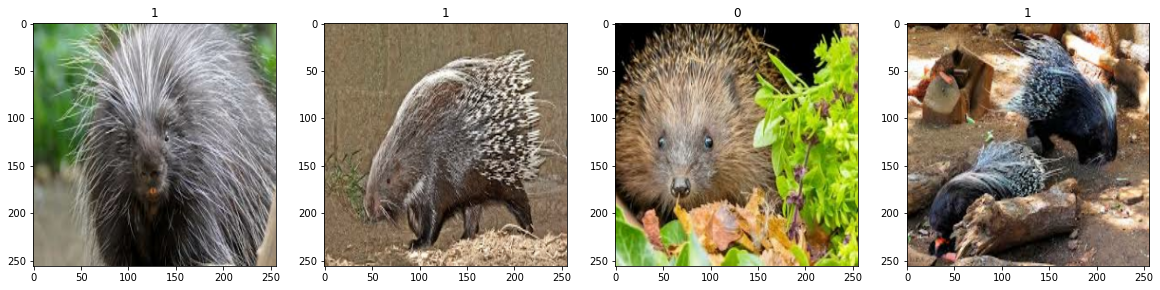

In [10]:
#Let's see which class belongs to which image
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Here we can see that the **Class 1==`Porcupine`**, and **Class 0==`Hedgehog`**

## 4. PREPROCESS DATA
<h4 style="background-color:#242c24;color:white;border-radius: 8px; padding:12px">4.1. SCALE DATA</h4>
To scale our data, we need to get our values between 0 and 1. For now, our values are still between 0 and 256. Let's confirm that...

In [11]:
#Let's see our minimum and maximum values
batch[0].min(), batch[0].max()

(0.0, 255.0)

So, we can see that our minimum value is 1 and our maximum value is 255. To scale our values so that they fall between 0 and 1, we need to divide it by 255. The lower the values, the better for optimization.

In [12]:
#For more efficiency, we'll use the data pipeline
#x--represents our images, y--represents our labels
data = data.map(lambda x,y: (x/255, y))

In [13]:
print('max: ', data.as_numpy_iterator().next()[0].max())
print('min: ', data.as_numpy_iterator().next()[0].min())

Cleanup called...
Cleanup called...


max:  1.0


Cleanup called...


min:  0.0


Cleanup called...


Our data is now succesfully scaled.

<h4 style="background-color:#242c24;color:white;border-radius: 8px; padding:12px">4.2. SPLIT DATA</h4>

Before splitting our data into train, validation and test set, let's see the length of our batches.

In [14]:
#Visualize the length of our data
print("There are",len(data),"batches in total.")

There are 15 batches in total.


In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size, val_size, test_size

(10, 3, 1)

In [17]:
#Take defines the dataset that should be taken to form the new dataset
#Skip defines the dataset that should be skipped to form the new dataset
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [18]:
len(train), len(val), len(test)

(10, 3, 1)

## 5. MODELING

<h4 style="background-color:#242c24;color:white;border-radius: 8px; padding:12px">5.1. CREATE MODEL AND ADD LAYERS</h4>

In [19]:
#Create model
model = Sequential()

In [20]:
#Add Convolutional and MaxPooling layers
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
#Flatten the data
model.add(Flatten())
#Add dense layers
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
#Compile the model
#We'll use the adam optimizer
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [22]:
#View the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0

<h4 style="background-color:#242c24;color:white;border-radius: 8px; padding:12px">5.2. TRAIN MODEL</h4>

In [23]:
#Create log directory
logdir='logs'

In [24]:
#Create callbacks
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

2022-10-10 02:51:04.654451: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-10-10 02:51:04.654495: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-10-10 02:51:04.656505: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-10-10 02:51:04.878251: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-10-10 02:51:04.878432: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [25]:
#Fit model
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30


Cleanup called...
Cleanup called...
2022-10-10 02:51:07.253130: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


 1/10 [==>...........................] - ETA: 1:12 - loss: 0.7076 - accuracy: 0.4375

2022-10-10 02:51:13.178495: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-10-10 02:51:13.178543: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


 2/10 [=====>........................] - ETA: 2s - loss: 2.6843 - accuracy: 0.4531  

2022-10-10 02:51:13.510981: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-10-10 02:51:13.511670: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-10-10 02:51:13.642163: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 143 callback api events and 140 activity events. 
2022-10-10 02:51:13.648990: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-10-10 02:51:13.663360: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2022_10_10_02_51_13

2022-10-10 02:51:13.667775: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_10_10_02_51_13/469123c883e3.trace.json.gz
2022-10-10 02:51:13.685673: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plug

 9/10 [==========================>...] - ETA: 0s - loss: 1.2691 - accuracy: 0.4965

Cleanup called...
Cleanup called...


10/10 [==============================] - 12s 412ms/step - loss: 1.2118 - accuracy: 0.4875 - val_loss: 0.6903 - val_accuracy: 0.7396
Epoch 2/30


Cleanup called...


 1/10 [==>...........................] - ETA: 6s - loss: 0.6899 - accuracy: 0.7500

Cleanup called...


10/10 [==============================] - ETA: 0s - loss: 0.6839 - accuracy: 0.5500

Cleanup called...
Cleanup called...


10/10 [==============================] - 4s 349ms/step - loss: 0.6839 - accuracy: 0.5500 - val_loss: 0.6657 - val_accuracy: 0.7083
Epoch 3/30


Cleanup called...


 1/10 [==>...........................] - ETA: 8s - loss: 0.6691 - accuracy: 0.6562

Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.6524 - accuracy: 0.6181

Cleanup called...
Cleanup called...


10/10 [==============================] - 4s 296ms/step - loss: 0.6525 - accuracy: 0.6281 - val_loss: 0.6452 - val_accuracy: 0.6771
Epoch 4/30


Cleanup called...


 2/10 [=====>........................] - ETA: 1s - loss: 0.6431 - accuracy: 0.6250

Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.6143 - accuracy: 0.6458

Cleanup called...
Cleanup called...


10/10 [==============================] - 3s 275ms/step - loss: 0.6193 - accuracy: 0.6344 - val_loss: 0.5805 - val_accuracy: 0.7396
Epoch 5/30


Cleanup called...


 2/10 [=====>........................] - ETA: 1s - loss: 0.5503 - accuracy: 0.7500

Cleanup called...


 8/10 [=======================>......] - ETA: 0s - loss: 0.5532 - accuracy: 0.7383

Cleanup called...
Cleanup called...


10/10 [==============================] - 4s 311ms/step - loss: 0.5339 - accuracy: 0.7469 - val_loss: 0.5375 - val_accuracy: 0.7708
Epoch 6/30


Cleanup called...


 2/10 [=====>........................] - ETA: 1s - loss: 0.4681 - accuracy: 0.7812

Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.5084 - accuracy: 0.7569

Cleanup called...
Cleanup called...


10/10 [==============================] - 4s 307ms/step - loss: 0.5032 - accuracy: 0.7656 - val_loss: 0.5947 - val_accuracy: 0.6562
Epoch 7/30


Cleanup called...


 2/10 [=====>........................] - ETA: 1s - loss: 0.6063 - accuracy: 0.6406

Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.5108 - accuracy: 0.7639

Cleanup called...
Cleanup called...


10/10 [==============================] - 4s 390ms/step - loss: 0.5008 - accuracy: 0.7719 - val_loss: 0.4432 - val_accuracy: 0.7917
Epoch 8/30


Cleanup called...


 1/10 [==>...........................] - ETA: 6s - loss: 0.4151 - accuracy: 0.8438

Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.4557 - accuracy: 0.8021

Cleanup called...
Cleanup called...


10/10 [==============================] - 4s 407ms/step - loss: 0.4543 - accuracy: 0.8000 - val_loss: 0.4049 - val_accuracy: 0.8333
Epoch 9/30


Cleanup called...


 1/10 [==>...........................] - ETA: 7s - loss: 0.4448 - accuracy: 0.7812

Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.3747 - accuracy: 0.8542

Cleanup called...
Cleanup called...


10/10 [==============================] - 5s 430ms/step - loss: 0.3844 - accuracy: 0.8562 - val_loss: 0.3681 - val_accuracy: 0.8750
Epoch 10/30


Cleanup called...


 2/10 [=====>........................] - ETA: 1s - loss: 0.2987 - accuracy: 0.8750

Cleanup called...


10/10 [==============================] - ETA: 0s - loss: 0.3336 - accuracy: 0.8500

Cleanup called...
Cleanup called...


10/10 [==============================] - 4s 400ms/step - loss: 0.3336 - accuracy: 0.8500 - val_loss: 0.3699 - val_accuracy: 0.8333
Epoch 11/30


Cleanup called...


 2/10 [=====>........................] - ETA: 1s - loss: 0.2722 - accuracy: 0.9062

Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.3034 - accuracy: 0.9028

Cleanup called...
Cleanup called...


10/10 [==============================] - 4s 391ms/step - loss: 0.2930 - accuracy: 0.9125 - val_loss: 0.3278 - val_accuracy: 0.8333
Epoch 12/30


Cleanup called...


 2/10 [=====>........................] - ETA: 1s - loss: 0.2762 - accuracy: 0.8594

Cleanup called...


 8/10 [=======================>......] - ETA: 0s - loss: 0.2919 - accuracy: 0.8789

Cleanup called...
Cleanup called...


10/10 [==============================] - 3s 298ms/step - loss: 0.2794 - accuracy: 0.8875 - val_loss: 0.2652 - val_accuracy: 0.9167
Epoch 13/30


Cleanup called...


 2/10 [=====>........................] - ETA: 1s - loss: 0.2437 - accuracy: 0.9062

Cleanup called...


 8/10 [=======================>......] - ETA: 0s - loss: 0.1928 - accuracy: 0.9336

Cleanup called...
Cleanup called...


10/10 [==============================] - 3s 288ms/step - loss: 0.1972 - accuracy: 0.9312 - val_loss: 0.2499 - val_accuracy: 0.9062
Epoch 14/30


Cleanup called...


 2/10 [=====>........................] - ETA: 1s - loss: 0.2399 - accuracy: 0.9062

Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.2509 - accuracy: 0.8924

Cleanup called...
Cleanup called...


10/10 [==============================] - 3s 280ms/step - loss: 0.2392 - accuracy: 0.9000 - val_loss: 0.1841 - val_accuracy: 0.9583
Epoch 15/30


Cleanup called...


 2/10 [=====>........................] - ETA: 0s - loss: 0.1781 - accuracy: 0.9219

Cleanup called...


 8/10 [=======================>......] - ETA: 0s - loss: 0.1938 - accuracy: 0.9336

Cleanup called...
Cleanup called...


10/10 [==============================] - 4s 306ms/step - loss: 0.1978 - accuracy: 0.9281 - val_loss: 0.1491 - val_accuracy: 0.9688
Epoch 16/30


Cleanup called...


 2/10 [=====>........................] - ETA: 0s - loss: 0.1122 - accuracy: 0.9844

Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.1443 - accuracy: 0.9618

Cleanup called...
Cleanup called...


10/10 [==============================] - 4s 380ms/step - loss: 0.1460 - accuracy: 0.9594 - val_loss: 0.1168 - val_accuracy: 0.9792
Epoch 17/30


Cleanup called...


 2/10 [=====>........................] - ETA: 1s - loss: 0.1524 - accuracy: 0.9531

Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.1211 - accuracy: 0.9653

Cleanup called...
Cleanup called...


10/10 [==============================] - 4s 395ms/step - loss: 0.1164 - accuracy: 0.9656 - val_loss: 0.0773 - val_accuracy: 0.9792
Epoch 18/30


Cleanup called...


 2/10 [=====>........................] - ETA: 1s - loss: 0.1645 - accuracy: 0.9375

Cleanup called...


10/10 [==============================] - ETA: 0s - loss: 0.0909 - accuracy: 0.9750

Cleanup called...
Cleanup called...


10/10 [==============================] - 4s 415ms/step - loss: 0.0909 - accuracy: 0.9750 - val_loss: 0.1151 - val_accuracy: 0.9583
Epoch 19/30


Cleanup called...


 2/10 [=====>........................] - ETA: 1s - loss: 0.0549 - accuracy: 1.0000

Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.0464 - accuracy: 1.0000

Cleanup called...
Cleanup called...


10/10 [==============================] - 4s 392ms/step - loss: 0.0495 - accuracy: 1.0000 - val_loss: 0.0315 - val_accuracy: 1.0000
Epoch 20/30


Cleanup called...


 2/10 [=====>........................] - ETA: 1s - loss: 0.0338 - accuracy: 1.0000

Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.0383 - accuracy: 0.9965

Cleanup called...
Cleanup called...


10/10 [==============================] - 4s 320ms/step - loss: 0.0392 - accuracy: 0.9969 - val_loss: 0.0719 - val_accuracy: 0.9688
Epoch 21/30


Cleanup called...


 2/10 [=====>........................] - ETA: 1s - loss: 0.0275 - accuracy: 1.0000

Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.0453 - accuracy: 0.9931

Cleanup called...
Cleanup called...


10/10 [==============================] - 3s 307ms/step - loss: 0.0422 - accuracy: 0.9937 - val_loss: 0.0391 - val_accuracy: 0.9896
Epoch 22/30


Cleanup called...


 2/10 [=====>........................] - ETA: 1s - loss: 0.0584 - accuracy: 0.9844

Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.0688 - accuracy: 0.9757

Cleanup called...
Cleanup called...


10/10 [==============================] - 4s 389ms/step - loss: 0.0650 - accuracy: 0.9781 - val_loss: 0.0268 - val_accuracy: 0.9896
Epoch 23/30


Cleanup called...


 2/10 [=====>........................] - ETA: 0s - loss: 0.0264 - accuracy: 1.0000

Cleanup called...


 8/10 [=======================>......] - ETA: 0s - loss: 0.0309 - accuracy: 0.9961

Cleanup called...
Cleanup called...


10/10 [==============================] - 4s 309ms/step - loss: 0.0284 - accuracy: 0.9969 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 24/30


Cleanup called...


 2/10 [=====>........................] - ETA: 1s - loss: 0.0205 - accuracy: 1.0000

Cleanup called...


10/10 [==============================] - ETA: 0s - loss: 0.0248 - accuracy: 0.9969

Cleanup called...
Cleanup called...


10/10 [==============================] - 4s 343ms/step - loss: 0.0248 - accuracy: 0.9969 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 25/30


Cleanup called...


 2/10 [=====>........................] - ETA: 0s - loss: 0.0112 - accuracy: 1.0000

Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.0122 - accuracy: 1.0000

Cleanup called...
Cleanup called...


10/10 [==============================] - 3s 279ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 26/30


Cleanup called...


 2/10 [=====>........................] - ETA: 1s - loss: 0.0097 - accuracy: 1.0000

Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.0074 - accuracy: 1.0000

Cleanup called...
Cleanup called...


10/10 [==============================] - 3s 295ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 27/30


Cleanup called...


 2/10 [=====>........................] - ETA: 1s - loss: 0.0056 - accuracy: 1.0000

Cleanup called...


 8/10 [=======================>......] - ETA: 0s - loss: 0.0059 - accuracy: 1.0000

Cleanup called...
Cleanup called...


10/10 [==============================] - 4s 287ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 28/30


Cleanup called...


 2/10 [=====>........................] - ETA: 1s - loss: 0.0035 - accuracy: 1.0000

Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.0052 - accuracy: 1.0000

Cleanup called...
Cleanup called...


10/10 [==============================] - 4s 388ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 29/30


Cleanup called...


 1/10 [==>...........................] - ETA: 7s - loss: 0.0042 - accuracy: 1.0000

Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.0053 - accuracy: 1.0000

Cleanup called...
Cleanup called...


10/10 [==============================] - 4s 398ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 0.9896
Epoch 30/30


Cleanup called...


 2/10 [=====>........................] - ETA: 1s - loss: 0.0039 - accuracy: 1.0000

Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.0046 - accuracy: 1.0000

Cleanup called...
Cleanup called...


10/10 [==============================] - 3s 283ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000


<h4 style="background-color:#242c24;color:white;border-radius: 8px; padding:12px">5.3. VISUALIZE MODEL PERFORMANCE</h4>

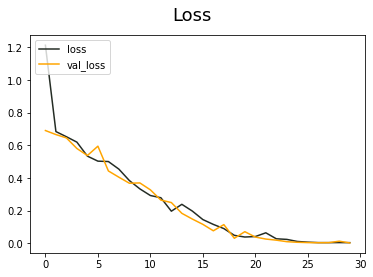

In [26]:
#Plot Loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='#242c24', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=18)
plt.legend(loc="upper left")
plt.show()

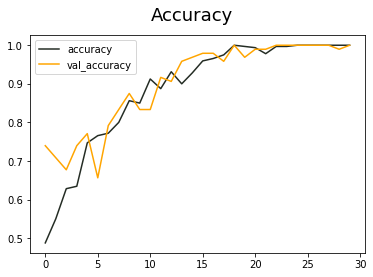

In [27]:
#Plot Accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='#242c24', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=18)
plt.legend(loc="upper left")
plt.show()

## 6. EVALUATION

In [28]:
#Import some evaluation metrics
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [29]:
#Establish instances
prec = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [30]:
#Loop through each batch in our test data
for batch in test.as_numpy_iterator(): 
    #Unpack it
    X, y = batch
    yhat = model.predict(X)
    prec.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

Cleanup called...
Cleanup called...


In [31]:
#Print the results
print(f'Precision:{prec.result().numpy()},Recall:{rec.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:1.0, Accuracy:1.0


These results show that our model is performing very well. 
Let's also test our model with an image it has never seen before, let's see if it can predict what class it belongs to. To do this, I picked two images from google --two separate images that are not part of the data.

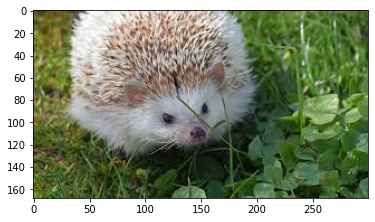

In [32]:
#Read the hedgehog image
img = cv2.imread('../input/porcupinehedgehogtest/hedgehogtest.jpeg')
#Convert from BGR to RGB
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

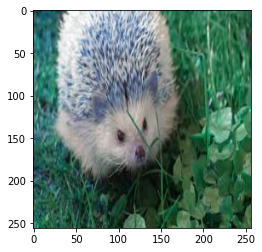

In [33]:
#Resize image before passing it through our neural network
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [34]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [35]:
#Prediction
print('Prediction:',yhat)

#Hedgehog <0.5
#Porcupine >0.5
if yhat > 0.5: 
    print(f'Predicted class is Porcupine')
else:
    print(f'Predicted class is Hedgehog')

Prediction: [[0.36035058]]
Predicted class is Hedgehog


Let's try with a different image. The image of a porcupine this time.

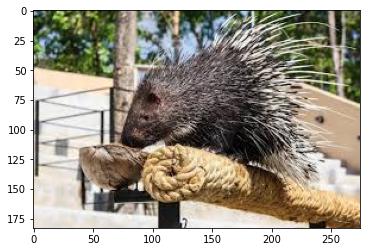

In [36]:
#Read the porcupine image
img2 = cv2.imread('../input/porcupinehedgehogtest/porcupinetest.jpeg')
#Convert from BGR to RGB
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

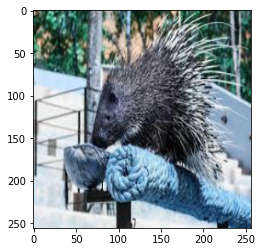

In [37]:
#Resize image before passing it through our neural network
resize = tf.image.resize(img2, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [39]:
#Prediction
print('Prediction:',yhat)

#Hedgehog <0.5
#Porcupine >0.5
if yhat > 0.5: 
    print(f'Predicted class is Porcupine')
else:
    print(f'Predicted class is Hedgehog')

Prediction: [[0.9999993]]
Predicted class is Porcupine


Excellent! Our model is doing pretty well. Now let's goo ahead and save our model.

## 7. SAVE MODEL

In [40]:
#Import dependency
from tensorflow.keras.models import load_model

In [41]:
#Save the model
model.save(os.path.join('models','porcupine_hedgehog_model.h5'))

Thank you for coming this far:) If you found this any helpful, do feel free to leave an upvote. Cheers!